In [72]:
import rdkit
from rdkit.Chem import Descriptors
from tqdm import tqdm
import pandas as pd

In [73]:
RDKIT_PROPS = {
    "1.0.0": [
        "FractionCSP3",
        "HeavyAtomCount",
        "MolLogP",
        "MolMR",
        "MolWt",
        "NHOHCount",
        "NOCount",
        "NumAliphaticCarbocycles",
        "NumAliphaticHeterocycles",
        "NumAliphaticRings",
        "NumAromaticCarbocycles",
        "NumAromaticHeterocycles",
        "NumAromaticRings",
        "NumHAcceptors",
        "NumHDonors",
        "NumHeteroatoms",
        "NumRotatableBonds",
        "NumSaturatedCarbocycles",
        "NumSaturatedHeterocycles",
        "NumSaturatedRings",
        "TPSA",
        "fr_Al_COO",
        "fr_Al_OH",
        "fr_Al_OH_noTert",
        "fr_ArN",
        "fr_Ar_COO",
        "fr_Ar_N",
        "fr_Ar_NH",
        "fr_Ar_OH",
        "fr_COO",
        "fr_COO2",
        "fr_C_O",
        "fr_C_O_noCOO",
        "fr_C_S",
        "fr_HOCCN",
        "fr_Imine",
        "fr_NH0",
        "fr_NH1",
        "fr_NH2",
        "fr_N_O",
        "fr_Ndealkylation1",
        "fr_Ndealkylation2",
        "fr_Nhpyrrole",
        "fr_SH",
        "fr_aldehyde",
        "fr_alkyl_carbamate",
        "fr_alkyl_halide",
        "fr_allylic_oxid",
        "fr_amide",
        "fr_amidine",
        "fr_aniline",
        "fr_aryl_methyl",
        "fr_azide",
        "fr_azo",
        "fr_barbitur",
        "fr_benzene",
        "fr_benzodiazepine",
        "fr_bicyclic",
        "fr_diazo",
        "fr_dihydropyridine",
        "fr_epoxide",
        "fr_ester",
        "fr_ether",
        "fr_furan",
        "fr_guanido",
        "fr_halogen",
        "fr_hdrzine",
        "fr_hdrzone",
        "fr_imidazole",
        "fr_imide",
        "fr_isocyan",
        "fr_isothiocyan",
        "fr_ketone",
        "fr_ketone_Topliss",
        "fr_lactam",
        "fr_lactone",
        "fr_methoxy",
        "fr_morpholine",
        "fr_nitrile",
        "fr_nitro",
        "fr_nitro_arom",
        "fr_nitro_arom_nonortho",
        "fr_nitroso",
        "fr_oxazole",
        "fr_oxime",
        "fr_para_hydroxylation",
        "fr_phenol",
        "fr_phenol_noOrthoHbond",
        "fr_phos_acid",
        "fr_phos_ester",
        "fr_piperdine",
        "fr_piperzine",
        "fr_priamide",
        "fr_prisulfonamd",
        "fr_pyridine",
        "fr_quatN",
        "fr_sulfide",
        "fr_sulfonamd",
        "fr_sulfone",
        "fr_term_acetylene",
        "fr_tetrazole",
        "fr_thiazole",
        "fr_thiocyan",
        "fr_thiophene",
        "fr_unbrch_alkane",
        "fr_urea",
    ]
}


CURRENT_VERSION = "1.0.0"


class Rdkit2d(object):
    def __init__(self):
        self.name = "rdkit2d"
        self.properties = RDKIT_PROPS[CURRENT_VERSION]
        self._funcs = {name: func for name, func in Descriptors.descList}

    def calc(self, mols):
        R = []
        for mol in tqdm(mols):
            r = []
            for prop in self.properties:
                r += [self._funcs[prop](mol)]
            R += [r]
        return pd.DataFrame(R, columns = self.properties)

desc = Rdkit2d()

In [74]:
from rdkit import Chem


# Analyze all series 4

mols = [Chem.MolFromSmiles(smi) for smi in list(pd.read_csv("data/raw/series4_processed.csv")["smiles"])]

In [75]:
s4 = desc.calc(mols)

100%|██████████| 387/387 [00:00<00:00, 546.39it/s]


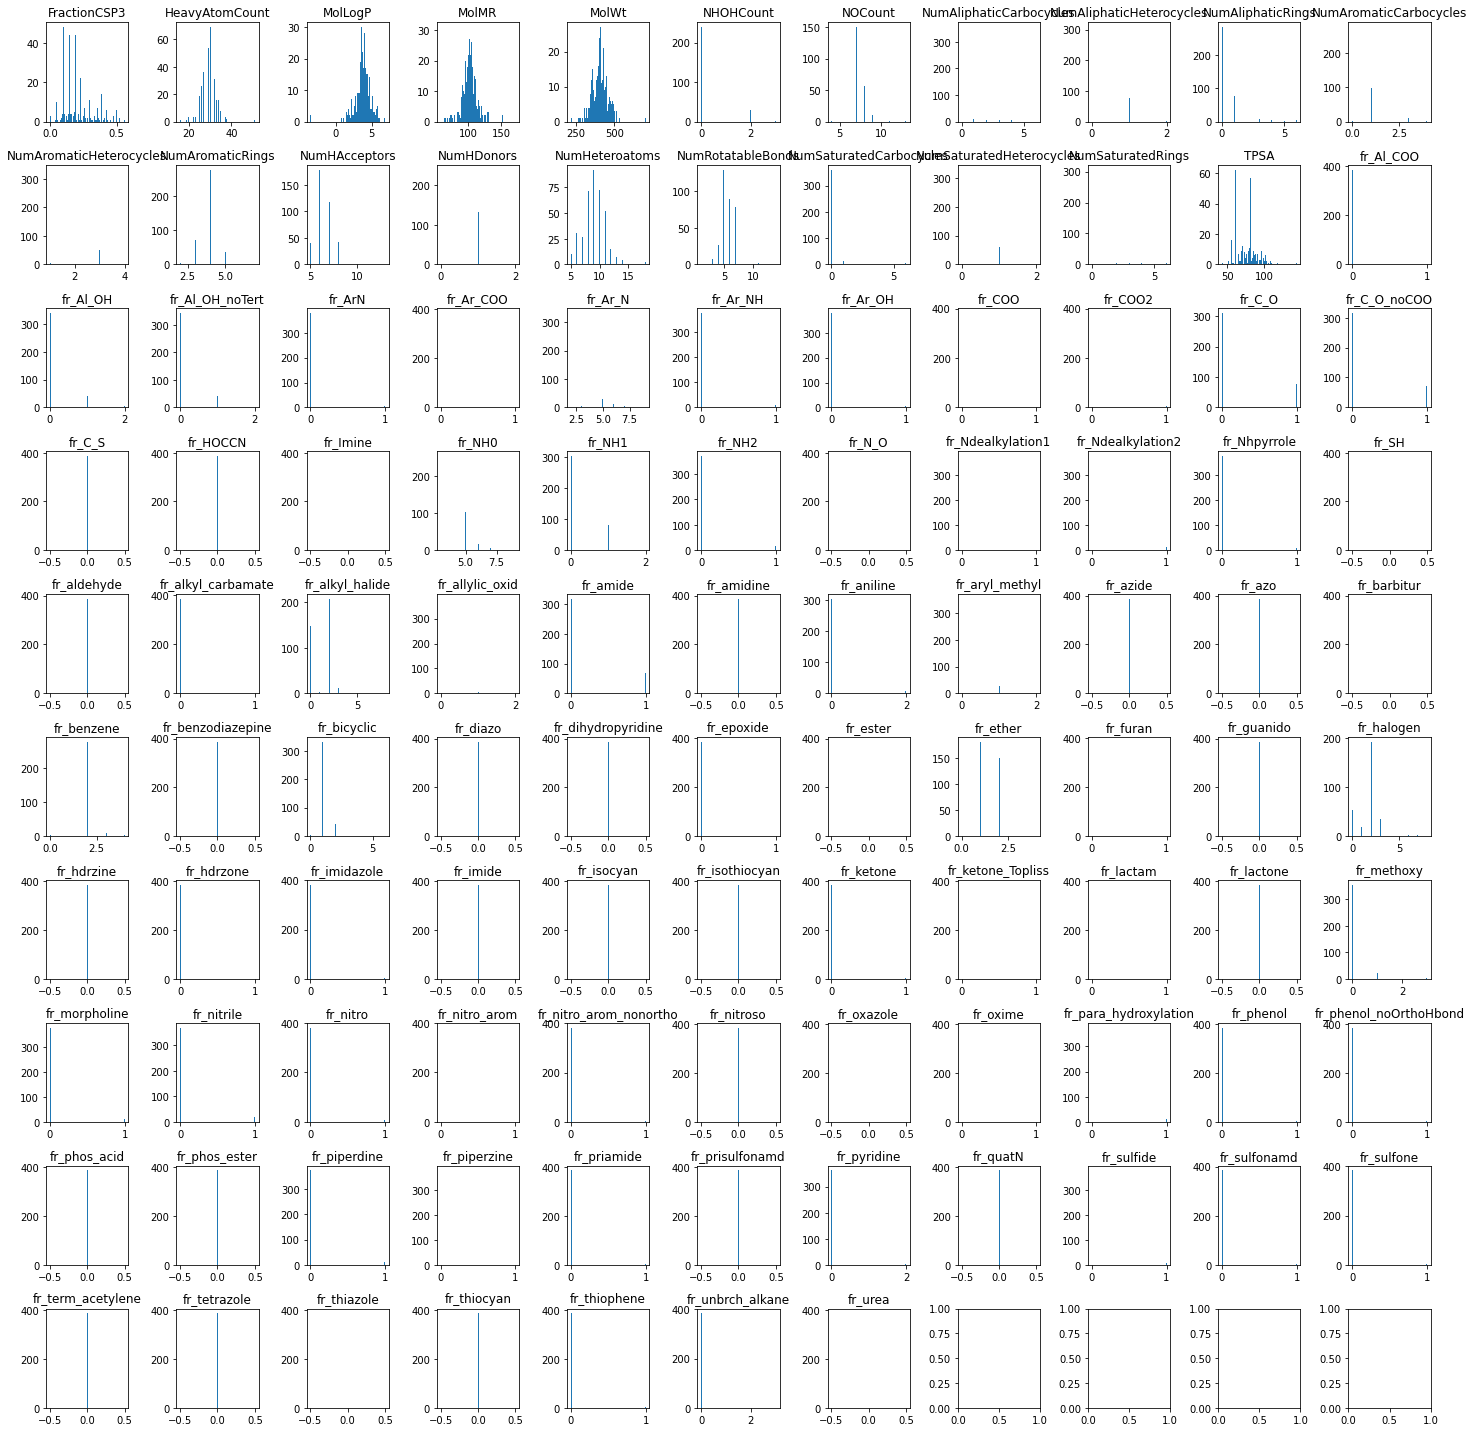

In [77]:
%matplotlib inline

fig, axs = plt.subplots(10, 11, figsize=(20,20))
axs = axs.flatten()
for i, c in enumerate(list(s4.columns)):
    ax = axs[i]
    ax.hist(s4[c],100)
    ax.set_title(c)
plt.tight_layout()

In [78]:
mols = [Chem.MolFromSmiles(smi) for smi in list(pd.read_csv("scripts/results/data_0.csv")["Smiles"])]

gen = desc.calc(mols)

100%|██████████| 9826/9826 [00:24<00:00, 406.39it/s]


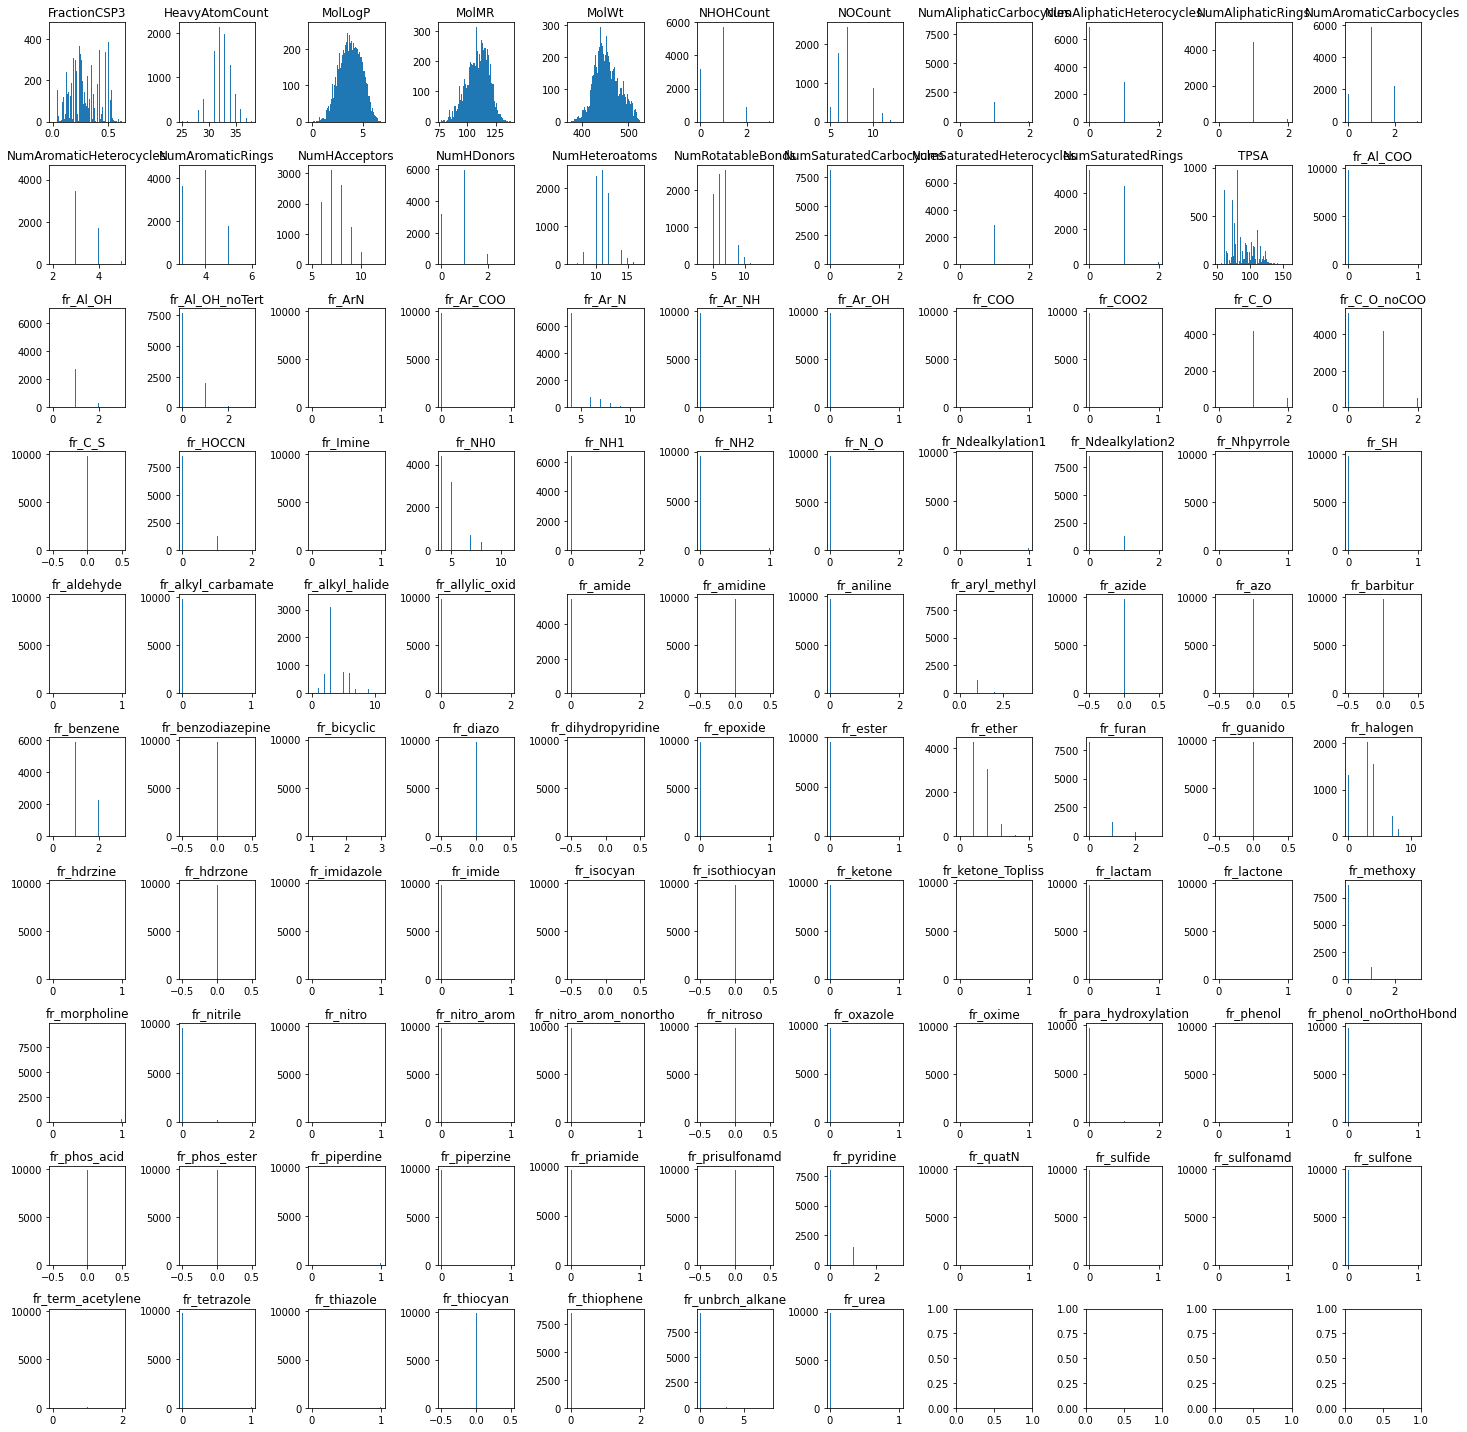

In [79]:
fig, axs = plt.subplots(10, 11, figsize=(20,20))
axs = axs.flatten()
for i, c in enumerate(list(gen.columns)):
    ax = axs[i]
    ax.hist(gen[c],100)
    ax.set_title(c)
plt.tight_layout()

(array([ 14.,   0., 181.,   0.,   0., 150.,   0.,  32.,   0.,  10.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

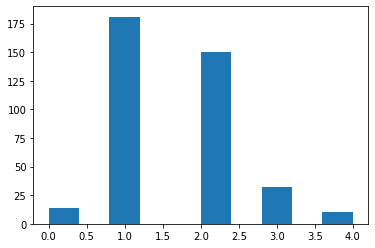

In [69]:

import matplotlib.pyplot as plt

plt.hist(s4['fr_ether'],10)


In [70]:
list(s4['fr_ether']).index(4)

11

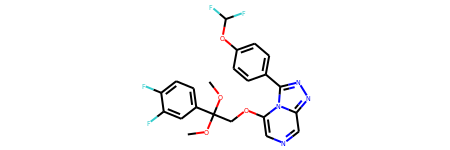

In [71]:
mols[11]